In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [22]:
df = pd.read_csv('startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [23]:
df.info()
df['State'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [24]:
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
Y = df['Profit']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=0)

In [26]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = regressor.predict(X_test)
y_pred

array([104054.44293869, 132719.3459701 , 133640.26830949,  72294.76911458,
       179685.62227843, 114508.97572031,  66305.23069863,  98297.69326565,
       114277.91894933, 169112.36095691,  96257.40152149,  87916.97242208,
       110687.33942598,  90670.8337806 , 127780.63539583])

In [28]:
# plt.scatter(X_train, y_train, color='red')
# plt.plot(X_train, regressor.predict(X_train), color = 'blue')

In [29]:
r_square = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
MSE  = mean_squared_error(y_test, y_pred)
RMSE = sqrt(MSE)

print(f'R-Squared: {r_square}')
print(f'Mean Absolute Error: {MAE}')
print(f'Mean Squared Error: {MSE}')
print(f'Root Mean Squared Error: {RMSE}')

R-Squared: 0.9355188337118217
Mean Absolute Error: 6489.660170486654
Mean Squared Error: 62240269.84291537
Root Mean Squared Error: 7889.250271281509


In [36]:
coef = regressor.coef_
intercept = regressor.intercept_

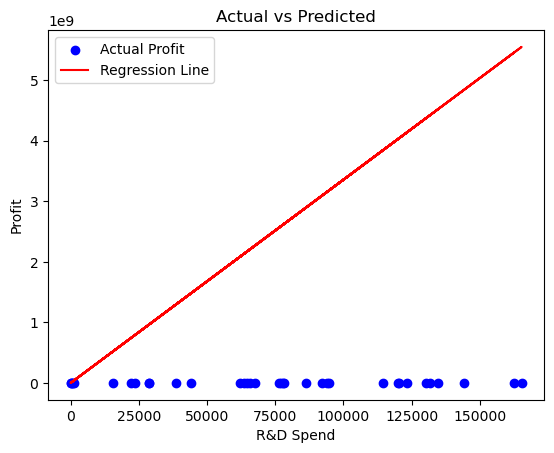

In [37]:
plt.scatter(X_train['R&D Spend'], y_train, color = 'blue', label='Actual Profit')
plt.plot(X_train['R&D Spend'], coef[0]*X_train['R&D Spend']*intercept, color = 'red', label='Regression Line')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()